<br>

# Continuous latent variables
---

Missing paragraph on find the explanation of the data, the manifold.

<br>

### PCA / SVD as latent variable models

PCA will center the data and transform the space of inputs so that each dimension is aligned with the maximum variance, and linearly independent (no covariance) with the other dimensions. If we assume that the data is generated by a multivariate gaussian $\mathcal{N}(x|\mu,\Sigma)$, this means that PCA will center the data at $\mu$ and align the axis so that the covariance matrix $\Sigma$ becomes a diagonal matrix $\Lambda$.

We can therefore use PCA (or simply SVD if we do not want to drop information about the distribution) to identify the latent variables (the most salient axis) associated to each data point of the design matrix $X$. In particular, we can use this decomposition to create a **generative model** that can produce inputs similar to our distribution.

This is very similar in the way we are able to generate points in a mixture of gaussian. If we know the value of the latent variable, the remaining variance is reduced (points are located in a cluster). Here, if we know the value of the most valuable axis (with highest eigen values), we can generate a point nearby using the variance information along the other axis.

**todo - rephrase**

[3.37789987]
[3.37789987 0.14210013]


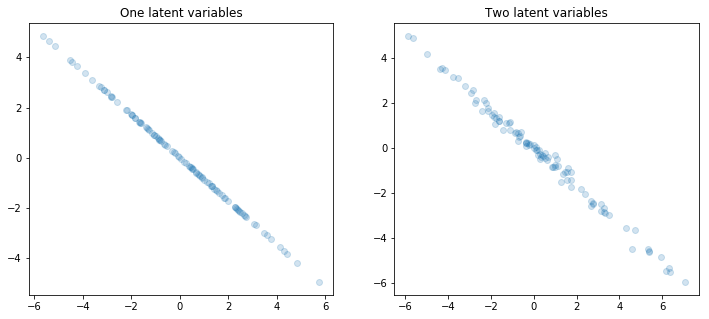

In [49]:
from sklearn.decomposition import *

# Simple example with clearly correlated features
X = np.array([
    [-1., 0.6],
    [ 0., 0.4],
    [ 1, -1.0]])


def generate_samples_of(X, nb_latent: int):
    # Remove the mean
    X_mean = np.mean(X, axis=0)
    X = X - X_mean
    
    # Decompose the covariance matrix, sort the eigen values by descending eigen values
    eigen_values, eigen_vectors = np.linalg.eig(X.T @ X)
    descending_indices = np.argsort(eigen_values)[::-1]
    W = eigen_vectors[:,descending_indices[:nb_latent]]

    # Project the data in this new space (we get the "latent variables") and evaluate its covariance
    Z = X @ W
    Cov_Z = np.diag(Z.T @ Z)
    print(Cov_Z)

    # Now we can generate new points by generating elements from the latent variables (of dimension 1 here)
    Z = np.random.normal(loc=np.zeros(shape=Cov_Z.shape), scale=Cov_Z, size=(100,len(Cov_Z)))
    return X_mean + Z @ W.T


generated_1 = generate_samples_of(X, nb_latent=1)
generated_2 = generate_samples_of(X, nb_latent=2)

_, ax = plt.subplots(figsize=(12,5), ncols=2)
ax[0].scatter(generated_1[:,0], generated_1[:,1], alpha=0.2)
ax[0].set_title('One latent variables')
ax[1].scatter(generated_2[:,0], generated_2[:,1], alpha=0.2)
ax[1].set_title('Two latent variables')
plt.show()

**todo: filling missing inputs as well - you should be able to generate some values because you have the covariance axis, and information about the latent variable**

<br>

# Example: filling missing values with latent variables
---

**todo**

<br>

# Continuous latent variables
---

The link with PCA: PCA will give us a sphere of the inputs, with axis align with the variance. This has a big connection to multivariate Gaussian with no covariance. This means you can easily generate points that match the distribution based on PCA.

* PCA
* Link with Embedding? In word2vec for instance?
* Auto encoders / binomial mixture distribution for MNIST
* Can it work for other things like classification or regression? does it even make sense? p(y|x)